# 과제: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화

## 과제 설명

### 1. 목표: 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.

### 2. 조건:
거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.
출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.
시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)




In [45]:
import numpy as np

3. 단계별 요구 사항

## 3.1 난수 좌표 생성:
[0, 1) 범위에서 100개의 2차원 좌표를 생성.



In [46]:
x = np.random.rand(100)
y = np.random.rand(100)

x.shape, y.shape

((100,), (100,))

In [ ]:
points = list(zip(x, y))
points

[(np.float64(0.16230403680957717), np.float64(0.10637890101815206)),
 (np.float64(0.5893400403393221), np.float64(0.9400265284813889)),
 (np.float64(0.7314669241366684), np.float64(0.6051770336011897)),
 (np.float64(0.37842901257695705), np.float64(0.19375056324735118)),
 (np.float64(0.9801387813489346), np.float64(0.15920224915407)),
 (np.float64(0.9215594462660587), np.float64(0.9970626913816616)),
 (np.float64(0.4244475215851623), np.float64(0.8365743660086596)),
 (np.float64(0.3636898974553816), np.float64(0.4128002183110605)),
 (np.float64(0.40328359289625637), np.float64(0.8245182934668126)),
 (np.float64(0.3166474923713769), np.float64(0.8116190638500079)),
 (np.float64(0.6074242695252149), np.float64(0.540387954291594)),
 (np.float64(0.16818579985275772), np.float64(0.3771758221204773)),
 (np.float64(0.9815592404171355), np.float64(0.11060361102099003)),
 (np.float64(0.8309690261919297), np.float64(0.1780562955861381)),
 (np.float64(0.44884919538541), np.float64(0.0785638303614

In [11]:
points = np.concatenate([x[:,None], y[:, None]], axis=1)
points.shape, points

((100, 2),
 array([[0.16230404, 0.1063789 ],
        [0.58934004, 0.94002653],
        [0.73146692, 0.60517703],
        [0.37842901, 0.19375056],
        [0.98013878, 0.15920225],
        [0.92155945, 0.99706269],
        [0.42444752, 0.83657437],
        [0.3636899 , 0.41280022],
        [0.40328359, 0.82451829],
        [0.31664749, 0.81161906],
        [0.60742427, 0.54038795],
        [0.1681858 , 0.37717582],
        [0.98155924, 0.11060361],
        [0.83096903, 0.1780563 ],
        [0.4488492 , 0.07856383],
        [0.3154654 , 0.14736733],
        [0.56918824, 0.97286246],
        [0.48883357, 0.24133668],
        [0.0297687 , 0.24528034],
        [0.52593129, 0.04721484],
        [0.38375276, 0.92507268],
        [0.64735456, 0.57249744],
        [0.33754104, 0.11465718],
        [0.58639882, 0.92908991],
        [0.39616754, 0.34838422],
        [0.40490405, 0.15614314],
        [0.64509603, 0.3567855 ],
        [0.51188065, 0.02216752],
        [0.04521478, 0.11526196],
   

In [ ]:
import numpy as np

np.random.rand(100, 2).shape

(100, 2)

In [51]:
A = np.arange(1, 4)
A.shape, A

((3,), array([1, 2, 3]))

In [52]:
B = np.arange(1, 4)[:, None]
B, B.shape

(array([[1],
        [2],
        [3]]),
 (3, 1))

In [54]:
# A = (1, 3)
# B = (3, 1)

A - B, (A - B).shape

(array([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]]),
 (3, 3))

In [59]:
x = np.random.rand(100)
x.shape

(100,)

In [60]:
y = np.random.rand(100).reshape(100, 1)
y.shape

(100, 1)

In [61]:
def f(x, y):
    return np.sqrt((x - y)**2)

In [62]:
f(x, y).shape

(100, 100)

In [69]:
A, np.broadcast_to(A, (3, 3))

(array([1, 2, 3]),
 array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]))

In [65]:
B, np.broadcast_to(B, (3, 3))

(array([[1],
        [2],
        [3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]))

In [70]:
points = np.random.rand(10, 2)
points, points.shape

(array([[0.48932675, 0.18327328],
        [0.03375121, 0.8898557 ],
        [0.11007174, 0.97147906],
        [0.9327892 , 0.55083675],
        [0.05172764, 0.56328565],
        [0.38471554, 0.81907576],
        [0.70440691, 0.39950123],
        [0.54261749, 0.01793597],
        [0.30212464, 0.1807542 ],
        [0.60573943, 0.61709187]]),
 (10, 2))

In [ ]:
# 각 좌표의 x, y 추출하는 방법!
points, points[:,0], points[:,1]

(array([[0.48932675, 0.18327328],
        [0.03375121, 0.8898557 ],
        [0.11007174, 0.97147906],
        [0.9327892 , 0.55083675],
        [0.05172764, 0.56328565],
        [0.38471554, 0.81907576],
        [0.70440691, 0.39950123],
        [0.54261749, 0.01793597],
        [0.30212464, 0.1807542 ],
        [0.60573943, 0.61709187]]),
 array([0.48932675, 0.03375121, 0.11007174, 0.9327892 , 0.05172764,
        0.38471554, 0.70440691, 0.54261749, 0.30212464, 0.60573943]),
 array([0.18327328, 0.8898557 , 0.97147906, 0.55083675, 0.56328565,
        0.81907576, 0.39950123, 0.01793597, 0.1807542 , 0.61709187]))

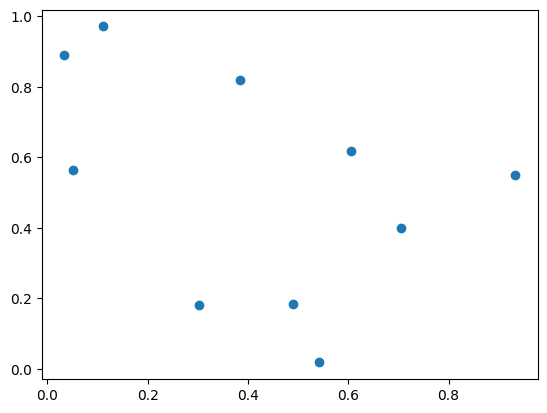

In [89]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1])

## 3.2 거리 행렬 계산:

각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.

In [90]:
points = np.random.rand(10, 2)
points[None, :, :].shape, points[:, None, :].shape

((1, 10, 2), (10, 1, 2))

In [ ]:
# 기존 (100,2) -> (1, 10, 2), (10, 4, 2)
points, points.shape, points[None, :, :], points[None, :, :].shape, points[:,None,:], points[:,None,:].shape

(array([[0.32182997, 0.56418957],
        [0.51216106, 0.16481233],
        [0.3443428 , 0.22545493],
        [0.09413755, 0.27706493],
        [0.48145058, 0.60159251],
        [0.63909414, 0.41243595],
        [0.13563635, 0.86270055],
        [0.89941444, 0.07391739],
        [0.64861492, 0.18473413],
        [0.84750643, 0.37177625]]),
 (10, 2),
 array([[[0.32182997, 0.56418957],
         [0.51216106, 0.16481233],
         [0.3443428 , 0.22545493],
         [0.09413755, 0.27706493],
         [0.48145058, 0.60159251],
         [0.63909414, 0.41243595],
         [0.13563635, 0.86270055],
         [0.89941444, 0.07391739],
         [0.64861492, 0.18473413],
         [0.84750643, 0.37177625]]]),
 (1, 10, 2),
 array([[[0.32182997, 0.56418957]],
 
        [[0.51216106, 0.16481233]],
 
        [[0.3443428 , 0.22545493]],
 
        [[0.09413755, 0.27706493]],
 
        [[0.48145058, 0.60159251]],
 
        [[0.63909414, 0.41243595]],
 
        [[0.13563635, 0.86270055]],
 
        [[0.8994

In [53]:
points = np.random.rand(10, 2)
points.shape, points[:, None, :].shape

((10, 2), (10, 1, 2))

In [54]:
d = points - points[:, None, :]
d.shape

(10, 10, 2)

In [55]:
d = (points - points[:, None, :])
d.shape

(10, 10, 2)

In [59]:
d = np.sqrt(np.sum((points - points[:, None, :])**2, axis=2))
d

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [58]:
from sklearn.metrics import pairwise_distances

points = np.random.rand(10, 2)
pairwise_distances(points)

array([[0.        , 0.75316332, 0.2765868 , 0.39186239, 0.87784314,
        0.81765984, 0.31911266, 0.42075669, 0.50957857, 0.47028307],
       [0.75316332, 0.        , 0.50045135, 0.58289796, 0.14077547,
        0.31163876, 0.43902595, 1.1037008 , 0.54752868, 0.3557191 ],
       [0.2765868 , 0.50045135, 0.        , 0.20818768, 0.63485951,
        0.63810783, 0.07338973, 0.68469371, 0.29296156, 0.19396288],
       [0.39186239, 0.58289796, 0.20818768, 0.        , 0.72366142,
        0.79132781, 0.2641626 , 0.810551  , 0.12027908, 0.22825243],
       [0.87784314, 0.14077547, 0.63485951, 0.72366142, 0.        ,
        0.26890745, 0.57015167, 1.2077931 , 0.68563871, 0.49643626],
       [0.81765984, 0.31163876, 0.63810783, 0.79132781, 0.26890745,
        0.        , 0.56477692, 1.07101464, 0.79373336, 0.57433529],
       [0.31911266, 0.43902595, 0.07338973, 0.2641626 , 0.57015167,
        0.56477692, 0.        , 0.70834278, 0.32934045, 0.17534787],
       [0.42075669, 1.1037008 , 0.6846937

In [52]:
np.argsort(d)

array([[0, 5, 4, 1, 7, 6, 8, 9, 2, 3],
       [1, 5, 0, 8, 6, 4, 7, 3, 2, 9],
       [2, 9, 8, 1, 7, 3, 0, 5, 6, 4],
       [3, 8, 6, 1, 5, 2, 0, 9, 7, 4],
       [4, 0, 5, 7, 1, 9, 6, 8, 2, 3],
       [5, 0, 1, 4, 6, 7, 8, 3, 9, 2],
       [6, 3, 8, 5, 1, 0, 4, 2, 7, 9],
       [7, 9, 0, 4, 1, 5, 2, 8, 6, 3],
       [8, 3, 1, 6, 2, 5, 0, 9, 7, 4],
       [9, 2, 7, 1, 0, 8, 4, 5, 3, 6]], dtype=int64)

In [50]:
data = np.random.rand(10)
data

array([0.10747072, 0.53482865, 0.48899658, 0.73044657, 0.09488453,
       0.30155786, 0.50093485, 0.96834425, 0.77651748, 0.26665473])

In [51]:
np.argsort(data)

array([4, 0, 9, 5, 2, 6, 1, 3, 8, 7], dtype=int64)

3.3 5-최근접 이웃 찾기:
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.



3.4 결과 출력:
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.



3.5 시각화:
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.

###### 연습장

In [98]:
data = np.random.randint(0, 10, (5, 2))
data

array([[7, 7],
       [3, 2],
       [7, 5],
       [7, 8],
       [5, 5]], dtype=int32)

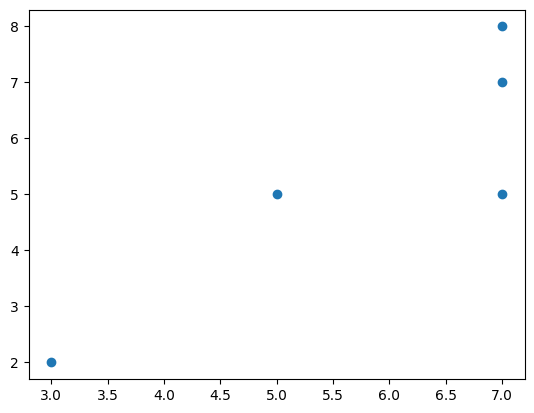

In [99]:
plt.scatter(data[:,0], data[:,1])

In [100]:
data[:, None, :]

array([[[7, 7]],

       [[3, 2]],

       [[7, 5]],

       [[7, 8]],

       [[5, 5]]], dtype=int32)

In [103]:
data[:, None, :].shape , data[None, :, :].shape

((5, 1, 2), (1, 5, 2))

In [105]:
data[:, None, :] - data[None, :, :], (data[:, None, :] - data[None, :, :]).shape

(array([[[ 0,  0],
         [ 4,  5],
         [ 0,  2],
         [ 0, -1],
         [ 2,  2]],
 
        [[-4, -5],
         [ 0,  0],
         [-4, -3],
         [-4, -6],
         [-2, -3]],
 
        [[ 0, -2],
         [ 4,  3],
         [ 0,  0],
         [ 0, -3],
         [ 2,  0]],
 
        [[ 0,  1],
         [ 4,  6],
         [ 0,  3],
         [ 0,  0],
         [ 2,  3]],
 
        [[-2, -2],
         [ 2,  3],
         [-2,  0],
         [-2, -3],
         [ 0,  0]]], dtype=int32),
 (5, 5, 2))

In [107]:
np.array([1,4]) - np.array([2,2])

array([-1,  2])

In [111]:
np.sqrt((np.array([1,4]) - np.array([2,2]))**2)

array([1., 2.])

In [ ]:
#np.sqrt((data[:, None, :] - data[None, :, :])**2), (np.sqrt((data[:, None, :] - data[None, :, :])**2)).shape

(array([[[0., 0.],
         [4., 5.],
         [0., 2.],
         [0., 1.],
         [2., 2.]],
 
        [[4., 5.],
         [0., 0.],
         [4., 3.],
         [4., 6.],
         [2., 3.]],
 
        [[0., 2.],
         [4., 3.],
         [0., 0.],
         [0., 3.],
         [2., 0.]],
 
        [[0., 1.],
         [4., 6.],
         [0., 3.],
         [0., 0.],
         [2., 3.]],
 
        [[2., 2.],
         [2., 3.],
         [2., 0.],
         [2., 3.],
         [0., 0.]]]),
 (5, 5, 2))

In [ ]:
# 거리 매트릭 만들기
#np.sum(np.sqrt((data[:, None, :] - data[None, :, :])**2), axis=2) # 거리를 계산한 인접행렬

array([[ 0.,  9.,  2.,  1.,  4.],
       [ 9.,  0.,  7., 10.,  5.],
       [ 2.,  7.,  0.,  3.,  2.],
       [ 1., 10.,  3.,  0.,  5.],
       [ 4.,  5.,  2.,  5.,  0.]])

In [ ]:
#dist = np.sqrt(np.sum((data[:, None, :] - data[None, :, :])**2), axis=2)
#np.sort(dist), np.sort(dist)[:, 1:4], np.argsort(dist) # 나한테서 가장 가까운 점 찾을 수 있겠다!

TypeError: sqrt() got an unexpected keyword argument 'axis'